In [4]:
import pandas as pd
import numpy as np
import os
os.chdir('D:/DataSet/PRD')
import sys
sys.path.append('D:/gitln/WorkCode/BaseFunc/')
#df = pd.read_csv('total_amt.csv',encoding='gbk')
#df['report_date'] = pd.to_datetime(df['report_date'],format='%Y/%m/%d')
#df.set_index('report_date', inplace=True)
balance = pd.read_csv('user_balance_table.csv')
balance['report_date'] = pd.to_datetime(balance['report_date'],
                                        format='%Y%m%d')
balance = balance.set_index('report_date')

In [5]:
balance = balance.drop(['category1','category2', 'category3', 
                       'category4'],axis=1)

In [6]:
balance.head()

,user_id,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt
report_date,,,,,,,,,,,,,
2014-08-05,1,20385,20383,2,0,0,0,0,0,0,0,0,2
2014-08-08,1,20391,20389,2,0,0,0,0,0,0,0,0,2
2014-08-11,1,20397,20395,2,0,0,0,0,0,0,0,0,2
2014-08-14,1,20403,20401,2,0,0,0,0,0,0,0,0,2
2014-08-17,1,20409,20407,2,0,0,0,0,0,0,0,0,2


In [7]:
mask = (balance.loc[:,'tBalance':]==0).all(axis=1)

In [8]:
balance = balance.loc[~mask,:]

In [9]:
total_purchase = balance.groupby(balance.index)['total_purchase_amt'].sum()
total_consume = balance.groupby(balance.index)['consume_amt'].sum()
total_transfer = balance.groupby(balance.index)['transfer_amt'].sum()


In [10]:
total_num = balance.groupby(balance.index)['user_id'].nunique()

In [21]:
df = pd.DataFrame({'purchase':total_purchase,'consume':total_consume,
              'transfer':total_transfer,'num':total_num})
df.to_csv('total_721.csv')

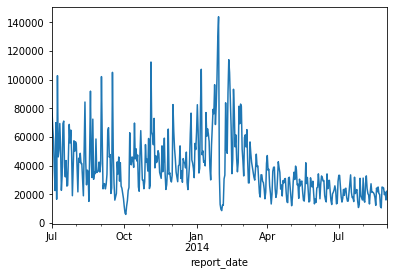

In [24]:
(df['purchase']/df['num']).plot()

In [55]:
year2013 = df.loc['2013-09',:]

In [62]:
year2013['purchase'].nlargest()

report_date
2013-09-16    161656210
2013-09-02    140844739
2013-09-11     98944459
2013-09-10     94684143
2013-09-03     80507880
Name: purchase, dtype: int64

In [31]:
import statsmodels.api as sm

In [50]:
model = sm.tsa.STL(df['purchase']/df['num'],robust=True).fit()

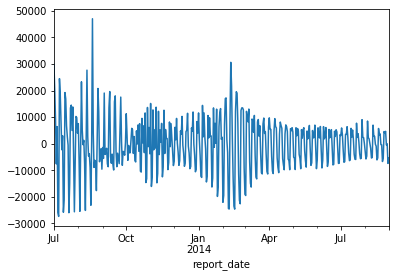

In [51]:
pd.Series(model.seasonal).plot()

In [64]:
holiday = ['2014-04-05','2014-04-06','2014-04-07','2014-05-01',
          '2014-05-02','2014-05-03','2014-05-31','2014-06-01',
          '2014-06-02']
workday = ['2014-05-04']

In [65]:

df.loc[~df.index.isin(holiday),:]

,purchase,consume,transfer,num
report_date,,,,
2013-07-01,32488348,382160,5142862,409
2013-07-02,29037390,350066,2204482,438
2013-07-03,27270770,454406,5499461,468
2013-07-04,18321185,535391,5875338,491
2013-07-05,11648749,697926,2065661,515
...,...,...,...,...
2014-08-27,302194801,107408171,360755976,12370
2014-08-28,245082751,98896299,198997562,12400
2014-08-29,267554713,103967802,169788578,12417


In [87]:
traindata1 = df.loc['2014-03':,:].copy()
traindata = traindata1.loc[~traindata1.index.isin(holiday),:].copy()

In [88]:
traindata['month'] = traindata.index.month
traindata['weekday'] = traindata.index.weekday
traindata['day'] = traindata.index.day

In [89]:
temp = traindata.groupby('month')['purchase'].mean()
temp.name='pur_mean'
traindata = pd.merge(traindata,temp,left_on='month',right_index=True)

In [90]:
traindata['purchase'] = traindata['purchase']/traindata['pur_mean']

In [92]:
temp1 = traindata.groupby('weekday')['purchase'].mean()
temp1.name = 'pur_week'
traindata = pd.merge(traindata,temp1,left_on='weekday',right_index=True)

In [94]:
traindata['purchase'] = traindata['purchase']/traindata['pur_week']

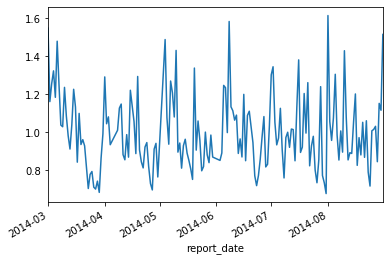

In [95]:
traindata['purchase'].plot()

In [96]:
traindata.groupby('day')['purchase'].mean()

day
1     1.439908
2     1.152639
3     1.040442
4     1.108530
5     1.157145
6     1.153324
7     1.056621
8     1.101686
9     1.040395
10    1.227195
11    0.988721
12    0.957802
13    0.918265
14    0.924067
15    1.078670
16    1.158357
17    0.887498
18    0.963370
19    1.030125
20    1.048189
21    0.959702
22    0.891398
23    0.837548
24    0.832112
25    0.850753
26    0.861823
27    0.875113
28    0.900135
29    0.895155
30    0.897772
31    1.061954
Name: purchase, dtype: float64